In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import scipy.stats as scs
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
plt.style.use("ggplot")

In [2]:
punc = string.punctuation

In [3]:
conn = psycopg2.connect('dbname = mh')

In [4]:
cur = conn.cursor()

In [5]:
query_post = """
    Select * from mh_anx_post;
    """

query_user = """
    Select * from mh_anx_user;
    """

In [6]:
cur.execute(query_post)

In [7]:
thread = cur.fetchall()

In [8]:
cur.execute(query_user)

In [9]:
members = cur.fetchall()

In [10]:
conn.commit()

### Text Cleaning and getting into document format

### Tagging

### mh forum cleaning

In [11]:
# for pandas df
pid = []
user = []
post = []
mood = []
post_type = []
post_title = []
title = []
forum_name = []

#for nlp matrix
md = defaultdict(list)

#for all posts
for info in thread:
    pid.append(info[0])
    user.append(info[1])
    
    #remove extra space in document and remove punctuation and append to dictionary
    doc = info[2]
    doc = "".join(re.sub(r'\s\s', '|', doc).split())
    doc = doc.replace("|", " ")
    doc = [letter for letter in doc if letter not in punc]
    doc = ("".join(doc).lower())
    md[info[1]].append(doc)
    
    post.append(doc)
    mood.append(info[3])
    post_type.append(info[4])
    post_title.append(info[5])
    title.append(info[6])
    forum_name.append(info[7])
    
# create post df from mh forum
mh_anx_post = pd.DataFrame({'pid':pid, 'user': user, 'post': post, 'mood': mood, 'post_type': post_type, 'post_title': post_title, 'thread_title': title, 'forum_name': forum_name})
mh_anx_post = mh_anx_post[['pid', 'user', 'post_title', 'post', 'post_type', 'mood', 'thread_title', 'forum_name']]

In [12]:
#for pandas df
user = []
join_date = []

for member in members:
    user.append(member[0])
    join_date.append(member[1])
    
mh_anx_user = pd.DataFrame({'user': user, 'member_since': join_date})
mh_anx_user = mh_anx_user[['user', 'member_since']]

In [13]:
mh_anx_post.head()

,pid,user,post_title,post,post_type,mood,thread_title,forum_name
0,1592723,Andy1963,Sudden Onset Anxiety - Please help!,hi ive never suffered any sort of anxiety befo...,author,nan,Sudden Onset Anxiety - Please help!,Generalized Anxiety Disorder
1,1592736,Zardos,nan,i can sympathize i get crippling anxiety when ...,responder,nan,Sudden Onset Anxiety - Please help!,Generalized Anxiety Disorder
2,1594183,rachelangelo,nan,im sorry youre dealing with this i dont know i...,responder,nan,Sudden Onset Anxiety - Please help!,Generalized Anxiety Disorder
3,1598245,akash,nan,apart from medical help there are many tricks ...,responder,nan,Sudden Onset Anxiety - Please help!,Generalized Anxiety Disorder
4,585119,Mayfair,nan,great tune i had my beatles number one hits i...,responder,nan,didnt know where to post this,Social Anxiety


In [14]:
mh_anx_user.head()

,user,member_since
0,steviep43,Jan 2018
1,Chalmers333,Jan 2018
2,JenIAm,Jan 2018
3,Aw3092,Jan 2018
4,srussells,Jan 2017


### PC forum cleaning

In [15]:
#query from pc forum
query_post = """
    Select * from pc_anx_post;
    """

query_user = """
    Select * from pc_anx_user;
    """

In [16]:
cur.execute(query_post)
thread = cur.fetchall()

In [17]:
cur.execute(query_user)
members = cur.fetchall()

In [18]:
pid = []
user = []
mood = []
post = []
post_type = []
post_title = []
forum_name = []
title = []


for info in thread:
    pid.append(info[0])
    user.append(info[1])
    mood.append(info[2])
    
    doc = info[3]
    doc = " ".join([word.strip().lower() for word in doc.split()])
    doc = "".join([letter for letter in doc if letter not in punc])
    md['user'].append(doc) #appending to dictionary of users and docs from above
    
    post.append(doc)
    post_type.append(info[4])
    post_title.append(info[5])
    forum_name.append(info[6])
    title.append(info[7])
    
    
    
pc_anx_post = pd.DataFrame({'pid': pid, 'user': user, 'mood': mood, 'post': post, 'post_type': post_type, 'post_title': post_title, 'thread_title': title, 'forum_name': forum_name})
pc_anx_post = pc_anx_post[['pid', 'user', 'post_title', 'post', 'post_type', 'mood', 'thread_title', 'forum_name']]

In [19]:
#for pandas df
user = []
join_date = []

for member in members:
    user.append(member[0])
    join_date.append(member[1])
    
pc_anx_user = pd.DataFrame({'user': user, 'member_since': join_date})
pc_anx_user = pc_anx_user[['user', 'member_since']]

In [20]:
pc_anx_post.head()

,pid,user,post_title,post,post_type,mood,thread_title,forum_name
0,5974949,BBB2,Is SA neurological?,is there neurological basis for sa i feel like...,author,ashamed,Is SA neurological?,Social Anxiety and Selective Mutism
1,5686333,AmandaBroken,Anxiety Daily Check-In point #4,amandabroken,responder,sunshine,Anxiety Daily Check-In point #4,Anxiety Panic and Phobias
2,5686378,zzzsmokeyzzz,Anxiety Daily Check-In point #4,feeling pretty good today life is going pretty...,responder,calm,Anxiety Daily Check-In point #4,Anxiety Panic and Phobias
3,5686442,DodgersMom,Anxiety Daily Check-In point #4,anxiety is through the roof just found out my ...,responder,content,Anxiety Daily Check-In point #4,Anxiety Panic and Phobias
4,5686444,AmandaBroken,Anxiety Daily Check-In point #4,amandabroken,responder,sunshine,Anxiety Daily Check-In point #4,Anxiety Panic and Phobias


In [21]:
pc_anx_user.head()

,user,member_since
0,Nike007,Jul 2015
1,Bozdickens,Jun 2016
2,sonjaward809,Feb 2013
3,shattered sanity,Aug 2012
4,sans,May 2013


### Merging DF's

In [22]:
anx_post = pd.concat([mh_anx_post, pc_anx_post])
anx_post.reset_index(drop = True, inplace = True)

In [23]:
anx_user = pd.concat([mh_anx_user, pc_anx_user])
anx_user.reset_index(drop = True, inplace = True)

In [24]:
user = anx_post['user']

In [25]:
'88butterfly88 ' in user

False

In [91]:
useru = anx_user['user']

In [92]:
'88butterfly88' in useru

False

# Basic Exploratory

In [173]:
anx_post['mood'].value_counts()

nan              25073
Sad               2235
Blah              1949
Angelic           1508
Crappy            1324
Confused          1212
Tired              852
Breezy             848
Lurking            822
Chatty             751
Lonely             716
Worried            647
Fine               643
Amazed             617
Scared             559
Cool               527
Pensive            502
Sleepy             440
Cheerful           419
Amused             411
Stressed           337
Aggressive         332
fine               308
Mellow             308
coping             289
Sick               279
Doh                254
Cynical            249
Inspired           246
Paranoid           217
                 ...  
hurting              5
indescribable        5
Drunk                4
amazed               4
tense                4
mellow               4
cynical              4
sleepy               4
crappy               3
restless             3
aggressive           3
annoyed              2
safe       

#### Number of Posts

In [93]:
num_posts = np.array([len(md[key]) for key in md])

In [94]:
num_posts.sort()

In [95]:
num_slice = num_posts[0:5800]
num_slice[-1]

32

Text(0.5,1,'Distribution of Posts')

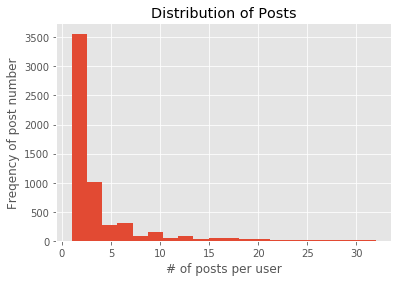

In [96]:
fig, ax = plt.subplots()
ax.hist(num_slice, bins = 20)
ax.set_xlabel("# of posts per user")
ax.set_ylabel("Freqency of post number")
ax.set_title("Distribution of Posts")

In [97]:
print("% of users with 1 post")
len(np.where(num_posts == 1)[0])/len(md)

% of users with 1 post


0.4058236272878536

In [98]:
print("% of users with 2 posts")
len(np.where(num_posts == 2)[0])/len(md)

% of users with 2 posts


0.1870216306156406

In [99]:
print("% of users with less than 5 posts")
len(np.where(num_posts < 5)[0])/len(md)

% of users with less than 5 posts


0.7605657237936772

In [100]:
print("% of users with less than 10 posts")
len(np.where(num_posts < 10)[0])/len(md)

% of users with less than 10 posts


0.8830282861896839

In [101]:
print("% of users with less than 20 posts")
len(np.where(num_posts < 20)[0])/len(md)

% of users with less than 20 posts


0.9417637271214643

**40 % of users only posted 1 time**

**75 % of users posted 5 times or less**

**88 % of users posted 10 times or less**

**95 % of users posted 20 times or less**

#### Length of Posts

In [405]:
lens_posts = np.array([len(post.split()) for key in md for post in md[key]])

In [406]:
scs.describe(lens_posts)

DescribeResult(nobs=47906, minmax=(0, 3220), mean=104.59785830584896, variance=21275.327914419413, skewness=5.380906312629288, kurtosis=55.774312952712876)

In [407]:
lens_posts.std()

145.85912315900637

Text(0.5,1,'Distribution of Post Lengths')

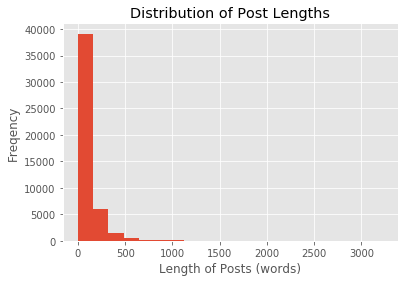

In [475]:
fig, ax = plt.subplots()
ax.hist(lens_posts, bins = 20)
ax.set_xlabel("Length of Posts (words)")
ax.set_ylabel("Freqency")
ax.set_title("Distribution of Post Lengths")

#### Length of Posts < 400 words

In [413]:
thresh = 400
postlens = [num for num in lens_posts if num < thresh]

Text(0.5,1,'Distribution of Post Lengths (less than 400 words)')

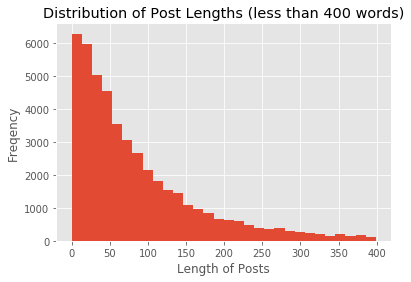

In [414]:
fig, ax = plt.subplots()
ax.hist(postlens, bins = 30)
ax.set_xlabel("Length of Posts")
ax.set_ylabel("Freqency")
ax.set_title("Distribution of Post Lengths (less than {} words)".format(thresh))

#### Distribution of lengths of 1 post

In [71]:
# lens of the 1post category
one_post_lens = np.array([len(post.split()) for key in md for post in md[key] if len(md[key]) == 1])

In [72]:
# actual posts for 1post category
post_1 = [post for key in md for post in md[key] if len(md[key]) == 1]

In [73]:
thresh = 100
one_post_lens = [num for num in one_post_lens if num < thresh]

Text(0.5,1,'Distribution of 1 Post Lengths < 100 (words)')

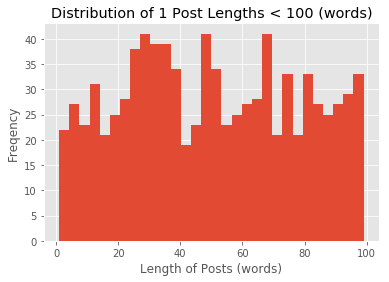

In [74]:
fig, ax = plt.subplots()
ax.hist(one_post_lens, bins = 30)
ax.set_xlabel("Length of Posts (words)")
ax.set_ylabel("Freqency")
ax.set_title("Distribution of 1 Post Lengths < {} (words)".format(thresh))

In [75]:
p1_20 = [post for post in post_1 if len(post.split()) <= 20]
p1_40 = [post for post in post_1 if 20 < len(post.split()) <= 40]
p1_60 = [post for post in post_1 if 40 < len(post.split()) <= 60]
p1_80 = [post for post in post_1 if 60 < len(post.split()) <= 80]
p1_100 = [post for post in post_1 if 80 < len(post.split()) <= 100]

In [456]:
print("length p1_20:", len(p1_20))
print("length p1_40:", len(p1_40))
print("length p1_60:", len(p1_60))
print("length p1_80:", len(p1_80))
print("length p1_100:", len(p1_100))

length p1_20: 149
length p1_40: 219
length p1_60: 170
length p1_80: 178
length p1_100: 169


**p1_20 tend to be short responses to to others**

In [477]:
print_docs(p1_20, 10)

dose any body get worse with there anxiety when havinng de flu
doc length: 12
i / len: 0.0
you / len: 0.0
--------------------
i stuggle to separate work and home life and need to talk about it
doc length: 14
i / len: 0.07142857142857142
you / len: 0.0
--------------------
be optimistic and positive thinking  the time is solving all the problems
doc length: 12
i / len: 0.0
you / len: 0.0
--------------------
httpswwwyoutubecomwatchve94iv4ijmty
doc length: 1
i / len: 0.0
you / len: 0.0
--------------------
yes please see another doctor i have also been in your position and a second opinion helped a lot
doc length: 19
i / len: 0.05263157894736842
you / len: 0.05263157894736842
--------------------
hey im having the same exact symptoms  did you figure out what it is yet  please let me know
doc length: 19
i / len: 0.05263157894736842
you / len: 0.05263157894736842
--------------------
very good advice well done
doc length: 5
i / len: 0.0
you / len: 0.0
--------------------
hi its called th

**p1_40 tend to be more short experiences and questions about them**

In [476]:
print_docs(p1_40, 10)

use to happen to me all the time drink alot of water with your food  and reaffirm yourself that it will pass
doc length: 22
i / len: 0.0
you / len: 0.045454545454545456
--------------------
it could be mild anxiety u wouldnt know for sure unless u spoke to a professional  but what u described sounds like my anxiety  welcome btw  xx
doc length: 27
i / len: 0.0
you / len: 0.0
--------------------
as someone who has been going through this is there any advice to a spouse of someone who seems to have the same problem on how to handle such issues and help them through life
doc length: 35
i / len: 0.0
you / len: 0.0
--------------------
hi   i was taking 5mg a few years ago and they never failed to knock me right out from personal experience i wouldnt take sleeping pills as well have you asked your doctor about that    c
doc length: 36
i / len: 0.05555555555555555
you / len: 0.05555555555555555
--------------------
i find relief from anxiety through art that conceptualizes similar feelings l

**p1_60 is more short info and questions and some questions from others**

In [478]:
print_docs(p1_60, 10)

dont try to not think about something which you not want to think about but focus your attention on something completely different focus your attention on things which are pleasant for you that you want to experience not on such things which scares you
doc length: 44
i / len: 0.0
you / len: 0.13636363636363635
--------------------
hello i have tried mindfulness meditation before and it can be a bit of a hit or miss i too find it hard to let go of things the best thing to do in that situation is try to learn from it and not see it as bad have you tried any books or dvds
doc length: 55
i / len: 0.03636363636363636
you / len: 0.01818181818181818
--------------------
youve got the shit end of the stick and no doubt  it takes a lot of guts to just lay yourself bare like that  take heart in the knowledge that you are lovable and loved after all youve been through a lesser man would have become bitter
doc length: 47
i / len: 0.0
you / len: 0.02127659574468085
--------------------
i just start

**p1_80 seems to be a more mixed bag**

In [479]:
print_docs(p1_80, 10)

hey   it is my first time here and i really like ur forum  i suffer from panic attack and agoraphobia   i canot go out  and if i go out to places far away from my home i have a hard panic attack   advice me what should i do  is it better to stay in my home or to face it   and what can i do when it attackes me hard   pls help meeeeeeeeeee
doc length: 73
i / len: 0.0958904109589041
you / len: 0.0
--------------------
hi vic   i am so sorry to hear that you are going through such a rough time i wish there was something that i could say to make you feel better but i know from experience that almost no one will be able to find the right words    i hope youll be able to get in touch with your psychiatrist soon that should be your focus    lots of love    esther
doc length: 70
i / len: 0.07142857142857142
you / len: 0.05714285714285714
--------------------
yes  i would say the worst part of my anxiety is the constant gi distress  its much worse when im hungry my therapist says my body is deal

In [76]:
print_docs(p1_100, 10)

i have paranoid schizophrenia i am not managing living at home alone i get panic attacks throughout the day i do not feel safe living alone  can someone please tell me how i qualify for shelteredsupported housing and also what is the waiting list like  i am under the cmht in my area i have told them that i hear voices throughout the day and i am self harming but they dont seem to be taking me seriously i feel like ending my life
doc length: 84
i / len: 0.11904761904761904
you / len: 0.0
--------------------
for me i was never scared of death until recently when i was a teenager i was quite dangerous i had no fear of death at that time  now i am developing a fear of death i have getting into my mind that i am destined for something big i really believe my destiny is towards something i will become famous for and talked about long after my death as part of history and it scares the shit out of me that i may possibly never get to leave my mark on society
doc length: 93
i / len: 0.10752688

# NLP

## Text Processing Pipeline

### Preparing the documents

In [108]:
user_list = [key for key in md] #md is the dictionary that i appended users and all users posts to

In [109]:
documents = [md[user] for user in user_list]

In [110]:
documents = [" ".join(doc) for doc in documents]

In [111]:
from nltk.corpus import stopwords

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [113]:
tfidf_vect = TfidfVectorizer(stop_words = 'english')

In [114]:
tfidf_vectorized = tfidf_vect.fit_transform(documents).toarray()

In [115]:
from sklearn.metrics.pairwise import linear_kernel

In [116]:
len(tfidf_vect.vocabulary_)

68780

In [117]:
cos_sim = linear_kernel(tfidf_vectorized, tfidf_vectorized)

In [118]:
top_match = np.argsort(cos_sim, axis = 1)

In [119]:
#remove self 
top_match = top_match[:, 0:-1]

### Comparing Users

In [194]:
def top_n_others(vect, ri, n, users):
    """
    Inputs:
        - sim_mat: tfidf vector matrix
        - ri: list of row indices which define users to pick from  
        - n: top n most similar users
        - matches: list of users
    Outputs:
        - user, that user's top n most similar matches starting with most similar
    """
    
    cos_sim = linear_kernel(vect, vect)
    sim_sort = np.argsort(cos_sim, axis = 1)
    sim_sort = sim_sort[:, 0:-1]
    top_n = list(range(-1,-n-1,-1))
    doc = sim_sort[ri, :]
    user = users[ri]
    sim_users = list(doc[top_n])
    return user, [users[sim] for sim in sim_users]

         
        
        
    

In [121]:
pint, sims = top_n_others(top_match, 2, 5, user_list)

In [122]:
print(pint)
print ("-"*((len(pint))))
print("doc:", " ".join(md[pint]))
print("-"*100)

for p in sims:
    print(p)
    print ("-"*((len(p))))
    print("doc:", " ".join(md[p]))
    print("-"*100)


rachelangelo 
-------------
doc: im sorry youre dealing with this i dont know if youre going through something stressful in life right now but often our body responds in odd ways to stress when you start feeling the dread try breathing deeply listening to soothing music and drinking water it seems simple but it really helps thanks for sharing its nice being a part of a support group and knowing that youre not alone anxiety is a difficult beast many days you can feel fine and then other days its overwhelming keep pressing on keeping reaching out thanks for being so brave and sharing youre not alone many people deal with the fear of associating with others i dealt with social anxiety for years someone told me that whenever im in a crowd to remember that most people are worried that when they meet new people they will be rejected think of everyone as scared and you dont feel so alone people are always going to try and push you to fit into a mold that they believe is best if you feel happy

**First issues:**
- **seems like people with long documents are being highly compared to others simply because of the probability that they are going to include words that match other peoples**
- **filtering out just response posts where people are simply responding to others is definitely a challenge ( need to figure out how to deal with this) but i don't want to filter the user completely. I want to filter out there response posts and keep their I posts.**

### Top words for different users

In [123]:
def top_words(vect, ri, n, lst, vocab):
    """
    Inputs:
        vect - tfidf vectorized matrix
        ri - row index of the matrix that represent different users
        n - number of top words
        lst - list of docs to get top words for
        vocab - list of vocabularly that corresponds to the indices of the vectorized matrix
    Outputs:
        tuple with user, list of top words
        
        Ex: 
        ('andy', ['hello', 'how', 'doing'])
        """
    
    row = vect[ri]
    srow = np.argsort(row)
    top_w = srow[-1:-n-1:-1]
    return (lst[ri], [vocab[i] for i in top_w])
    
    
    

In [124]:
print(top_words(tfidf_vectorized, 0, 5, user_list, tfidf_vect.get_feature_names()))

('Andy1963 ', ['unaffected', 'envelopes', 'apprehensive', 'sort', 'pin'])


In [125]:
[top_words(tfidf_vectorized, i, 5, user_list, tfidf_vect.get_feature_names()) for i in range(0,100,5)]

[('Andy1963 ', ['unaffected', 'envelopes', 'apprehensive', 'sort', 'pin']),
 ('Ainsworth11', ['seizure', 'seizures', 'atm', 'partial', 'dont']),
 ('Janey1966 ', ['mum', 'hubby', '2015', 'died', 'hospice']),
 ('Hellbilly ', ['lol', 'realy', 'cos', 'mami', 'know']),
 ('SickOfTh', ['rewire', '500mg', 'stimulant', 'messes', 'mdma']),
 ('Karenmaxpul ',
  ['primerxmart', 'etizolam', 'chapter', 'pharmacy', 'closed']),
 ('Moment ', ['dean', 'capitalizing', 'learners', 'agreeing', 'expressing']),
 ('LittleGlitter ', ['louder', 'partner', 'felt', 'yesican', 'reconciled']),
 ('exyz ', ['natalie', 'wishes', 'exfbu', 'krauser', 'ok']),
 ('Jonni ', ['youre', 'shaking', 'familiar', 'dating', 'sexaul']),
 ('Mollygirl ', ['afraid', 'chathope', 'needdont', 'reactioni', 'oneafter']),
 ('SunnyDaze ', ['weapons', 'talked', 'claire', 'shoulders', 'maybe']),
 ('Toasted Crumpet ', ['people', 'think', 'like', 'dont', 'help']),
 ('Melancholic ',
  ['benzo', 'thingsobjects', 'twiice', 'psychosomatization', 'scan

- **doesn't seem to be too helpful**

### Top words in different forums

In [126]:
anx_post.head()

,pid,user,post_title,post,post_type,mood,thread_title,forum_name
0,1592723,Andy1963,Sudden Onset Anxiety - Please help!,hi ive never suffered any sort of anxiety befo...,author,nan,Sudden Onset Anxiety - Please help!,Generalized Anxiety Disorder
1,1592736,Zardos,nan,i can sympathize i get crippling anxiety when ...,responder,nan,Sudden Onset Anxiety - Please help!,Generalized Anxiety Disorder
2,1594183,rachelangelo,nan,im sorry youre dealing with this i dont know i...,responder,nan,Sudden Onset Anxiety - Please help!,Generalized Anxiety Disorder
3,1598245,akash,nan,apart from medical help there are many tricks ...,responder,nan,Sudden Onset Anxiety - Please help!,Generalized Anxiety Disorder
4,585119,Mayfair,nan,great tune i had my beatles number one hits i...,responder,nan,didnt know where to post this,Social Anxiety


In [127]:
forum = anx_post['forum_name']
post = anx_post['post']

In [128]:
d = defaultdict(list)
for i in range(0, len(anx_post)):
    d[forum[i]].append(post[i])

In [129]:
dtest = {'a': ['hey', 'whats', 'up'], 'b':['n2m', 'you']}
k = [key for key in dtest]
nums = [" ".join(dtest[key]) for key in k]
nums

['hey whats up', 'n2m you']

In [130]:
fms = forum.unique()
docs = [" ".join(d[fm]) for fm in fms]

In [131]:
vectorizer = TfidfVectorizer(stop_words = 'english', max_df = .5)
vect = vectorizer.fit_transform(docs).toarray()

In [132]:
vocab = vectorizer.get_feature_names()

In [133]:
for i in range(0, len(fms)):
    print(top_words(vect, i, 5, fms, vocab))

('Generalized Anxiety Disorder', ['council', 'seroxat', 'mirtazapine', 'withdrawl', 'rachy'])
('Social Anxiety', ['blush', 'blushing', 'pub', 'chatting', 'sis'])
('Anxiety', ['mami', 'cally', 'lorezapam', 'rubbish', 'heroin'])
('Panic Disorder and Agoraphobia', ['mirtazapine', 'wrag', 'verity', 'paroxetine', 'diaphragmatic'])
('Specific Phobias', ['spider', 'rats', 'homicidal', 'wasps', 'balloons'])
('Social Anxiety and Selective Mutism', ['psychcentral', 'speeches', 'prettymuch', 'thanisson', 'valedictorian'])
('Anxiety Panic and Phobias', ['jennifer', '1967', 'amandabroken', 'dowdythefifth', '88butterfly88'])
('Anxiety Success Stories', ['amateur', 'worrist', 'freeway', 'actor', 'camaraderie'])


**Running into the problem of my TF being so high that it outweighs the IDF**
- put meaningless words into my stop words
- change the max_df


# Filtering Exploration - personal messages from responses

### 1) Filtering for 1st person pronouns

**Not personal:**
    - doesn't contain 'i' or 'im'
**Personal:**
    - contains 'i' or 'im'

In [134]:
# pd is a dictionary of users and posts where the post is considered personal
# npd is a dictionary of users and posts where the post is considered not personal

pdt = defaultdict(list)
npdt = defaultdict(list)

In [135]:
for key in md:
    posts = md[key]
    for post in posts:
        if post.split().count('i') > 0 or post.split().count('im') > 0:
            pdt[key].append(post)
        else:
            npdt[key].append(post)

In [136]:
print('# npdt users:', len(npdt))
print('# pdt users:', len(pdt))

# npdt users: 1735
# pdt users: 5734


In [137]:
print("# posts pdt:", sum(([len(pdt[key]) for key in pdt])))
print("# posts npdt:", sum([len(npdt[key]) for key in npdt]))

# posts pdt: 37604
# posts npdt: 10302


**creating user list and documents**

In [138]:
user_list = [key for key in pdt] #md is the dictionary that i appended users and all users posts to

In [139]:
documents = [pdt[user] for user in user_list]

In [140]:
documents = [" ".join(doc) for doc in documents]

**NLP**

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [142]:
tfidf_vect = TfidfVectorizer(stop_words = 'english')

In [143]:
tfidf_vectorized = tfidf_vect.fit_transform(documents).toarray()

In [144]:
from sklearn.metrics.pairwise import linear_kernel

In [145]:
len(tfidf_vect.vocabulary_)

64653

In [146]:
cos_sim = linear_kernel(tfidf_vectorized, tfidf_vectorized)

In [147]:
pint, sims = top_n_others(cos_sim, 2, 5, user_list)

In [148]:
print(pint)
print ("-"*((len(pint))))
print("doc:", " ".join(pdt[pint]))
print("-"*100)

for p in sims:
    print(p)
    print ("-"*((len(p))))
    print("doc:", " ".join(pdt[p]))
    print("-"*100)


rachelangelo 
-------------
doc: im sorry youre dealing with this i dont know if youre going through something stressful in life right now but often our body responds in odd ways to stress when you start feeling the dread try breathing deeply listening to soothing music and drinking water it seems simple but it really helps thanks for being so brave and sharing youre not alone many people deal with the fear of associating with others i dealt with social anxiety for years someone told me that whenever im in a crowd to remember that most people are worried that when they meet new people they will be rejected think of everyone as scared and you dont feel so alone im sorry that youre going through all of this thank you for being so brave and sharing i grew up in a home where my parents fought like crazy finally my mom and dad got divorced it took me a really long time to realize that it was not my responsibility to fix my parents marriage i know you want to help but the best thing you can 

### 2) Filtering for 2nd person pronouns

In [149]:
pdt = defaultdict(list)
npdt = defaultdict(list)

In [150]:
for key in md:
    posts = md[key]
    for post in posts:
        if post.split().count('you') > 0 or post.split().count('your') > 0:
            npdt[key].append(post)
        else:
            pdt[key].append(post)

In [151]:
print('# npd users:', len(npdt))
print('# pd users:', len(pdt))

# npd users: 4398
# pd users: 4021


In [152]:
print("# posts pd:", sum(([len(pdt[key]) for key in pdt])))
print("# of posts npd:", sum([len(npdt[key]) for key in npdt]))

# posts pd: 20425
# of posts npd: 27481


**creating user list and documents**

In [153]:
user_list = [key for key in pdt] #md is the dictionary that i appended users and all users posts to

In [154]:
documents = [pdt[user] for user in user_list]

In [155]:
documents = [" ".join(doc) for doc in documents]

**NLP**

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [157]:
tfidf_vect = TfidfVectorizer(stop_words = 'english')

In [158]:
tfidf_vectorized = tfidf_vect.fit_transform(documents).toarray()

In [159]:
from sklearn.metrics.pairwise import linear_kernel

In [160]:
len(tfidf_vect.vocabulary_)

35751

In [161]:
cos_sim = linear_kernel(tfidf_vectorized, tfidf_vectorized)

In [162]:
pint, sims = top_n_others(cos_sim, 10, 5, user_list)

In [163]:
print(pint)
print ("-"*((len(pint))))
print("doc:", " ".join(pdt[pint]))
print("-"*100)

for p in sims:
    print(p)
    print ("-"*((len(p))))
    print("doc:", " ".join(pdt[p]))
    print("-"*100)


ziedite 
--------
doc: struggling that was not meant to be any sort of criticism to supermariobros but just a comment that maybe n american forums could give him some geographically relevant help  but we in the uk can help too of course and we will we will what ever we can offer in terms of advice or help we will life is hard and often one can say life can be shitty too  so keep trying to find people that will listen like here and can offer some words of solace
----------------------------------------------------------------------------------------------------
Mayfair 
--------
doc: great tune  i had my beatles number one hits in my car last week they are genius with chords thats their secret but only weirdos like me recognise it my car got broke into last week and they emptied it  oasis said they were influenced by them and liked it and they copied it in their early work  which is why their chords were ace too  only freakos can hear genius chord manipulation and the use of it the rest

### 3) Filtering based on # of 1st person vs # of 2nd person

In [164]:
pdt = defaultdict(list)
npdt = defaultdict(list)

In [165]:
for key in md:
    posts = md[key]
    for post in posts:
        num_1st = post.split().count('i') + post.split().count('im') 
        num_2nd = post.split().count('you') + post.split().count('your') + post.split().count('youre') 
        if num_1st > num_2nd:
            pdt[key].append(post)
        else:
            npdt[key].append(post)

In [166]:
print('# npd users:', len(npdt))
print('# pd users:', len(pdt))

# npd users: 2832
# pd users: 5244


In [167]:
print("# posts pd:", sum(([len(pdt[key]) for key in pdt])))
print("# of posts npd:", sum([len(npdt[key]) for key in npdt]))

# posts pd: 26075
# of posts npd: 21831


### 4)  Filtering hogwash

In [470]:
d = {'d1': [], 'd2': [], 'd3': [], 'd4': [], 'd5': [], 'd6': [], 'd7': [], 'd8': []}

In [471]:
cnt = 0
for key in md:
    for post in md[key]:
        cnt += 1
        if 0 <= len(post.split()) <=30:
            d['d1'].append(post.split())
        elif 30 < len(post.split()) <= 60:
            d['d2'].append(post)
        elif 60 < len(post.split()) <= 100:
            d['d3'].append(post)
        elif 100 < len(post.split()) <= 200:
            d['d4'].append(post)
        elif 200 < len(post.split()) <= 500:
            d['d5'].append(post)
        elif 500 < len(post.split()) <= 1000:
            d['d6'].append(post)
        elif 1000 < len(post.split()) <= 2000:
            d['d7'].append(post)
        else:
            d['d8'].append(post)
print(cnt)
                    

47906


In [472]:
for k in d:
    print(len(d[k]))

13934
9810
8455
9378
5250
915
141
23


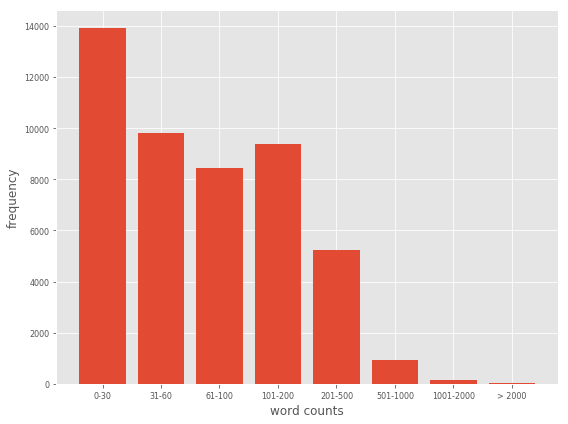

In [474]:
import matplotlib
heights = [len(d[k]) for k in d]
x = list(range(0,len(heights)))
labels = ['0-30', '31-60', '61-100', '101-200', '201-500', '501-1000', '1001-2000', '> 2000']

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(x, heights)
ax.set_xlabel("word counts")
ax.set_ylabel("frequency")
ax.tick_params(labelsize = 8)
plt.xticks(x, labels)
plt.tight_layout()

In [51]:
labels = []
docs = []
for key in d:
    labels.append(key)
    docs.append(" ".join(d[key]))

In [52]:
from nltk.corpus import stopwords

In [53]:
stops = stopwords.words('english')

In [54]:
stops.extend(['im', 'like', 'just', 'dont', 'really', 'ive', 'things', 'going', 'hi', 'xx', 'jennifer', 'hello'])

In [59]:
stops.extend([user.strip().lower() for user in user_list])

In [62]:
tfidf_vect = TfidfVectorizer(stop_words = stops)

In [63]:
tfidf_vectorized = tfidf_vect.fit_transform(docs).toarray()

In [64]:
features = tfidf_vect.get_feature_names()

In [171]:
for n in range(len(d)):
    print(top_words(tfidf_vectorized, n, 50, labels, features))
    print("----------------------------------------------------")

('d1', ['keys', 'challenges', 'httpwwwrxlistcomxanaxdrughtm', 'advising', 'foreverits', 'chemistery', 'legacies', 'farr', 'fellowships', 'calciummagnesiumd3', 'clooney', 'chronic', 'adherence', 'hellbent', 'hought', 'imprints', 'chasing', 'limbs', 'coeliac', 'ambling', 'environment', 'downanxious', 'clinician', 'anjoy', 'blank', 'hardass', 'hypothetical', 'constipatedit', 'culpritwelli', 'blahblahblah', 'disadvantage', 'acuppa', 'demise', 'clan', 'clapping', 'clare', 'clamorous', 'clamp', 'claraudienceand', 'clamped', 'clapton', 'clamps', 'clapped', 'clancy', 'clapham', 'clapa', 'clams', 'clammy', 'clap', 'clamup'])
----------------------------------------------------
('d2', ['eradicating', 'eater', 'hopefull', 'eminently', '3500', '015', 'grumble', 'lifeproblems', 'cabinet', 'buttermere', 'iif', 'cabin', 'ecti', 'canxxx', 'embryos', 'ambling', '186', 'flushedfuzzy', 'godsleep', 'demise', 'criminalising', 'doctorsopticians', 'bitey', 'aloneyou', 'apologys', 'improvise', 'era', 'lightre

**Its become apparent that i need to use a stemmer**
**I also need to filter out really high frequency words that aren't important to substance**
- nothing that relates to feeling 
- n-grams will be very important bc a lot is changed from "i don't feel good" to "i feel good"

### 5)  Filtering for 1st person and feeling

In [175]:
from nltk.stem.porter import PorterStemmer

In [357]:
pdt = defaultdict(list)
total = 0
cnt = 0
for key in md:
    users.append(key)
    posts = []
    for post in md[key]:
        total += 1
#         if (post.split().count('i') > 0 or post.split().count('im') > 0) and (post.split().count('feel') > 0 or post.split().count('feeling') > 0):
#             pdt.append(post)
#             cnt += 1
        if "i feel" in post or "im feeling" in post:
            pdt[key].append(post)
            cnt += 1
        else:
            continue

print(cnt)
print(total)
print(cnt/total)
            
        
        
    

5394
47906
0.11259549951989313


In [369]:
users = [key for key in pdt]
docs = [" ".join(pdt[user]) for user in users]

In [370]:
from nltk.corpus import stopwords

In [371]:
stops = stopwords.words('english')

In [372]:
stops.extend(['im', 'like', 'just', 'dont', 'really', 'ive', 'things', 'going', 'hi', 'xx', 'jennifer', 'hello'])

In [373]:
stops.extend([user.strip().lower() for user in user_list])

In [374]:
tfidf_vect = TfidfVectorizer(stop_words = stops)

In [375]:
tfidf_vectorized = tfidf_vect.fit_transform(docs).toarray()

In [376]:
features = tfidf_vect.get_feature_names()

In [377]:
pint, sims = top_n_others(tfidf_vectorized, 30, 5, users)

In [378]:
print(pint)
print ("-"*((len(pint))))
print("doc:", " ".join(pdt[pint]))
print("-"*100)

for p in sims:
    print(p)
    print ("-"*((len(p))))
    print("doc:", " ".join(pdt[p]))
    print("-"*100)


Nicola398
---------
doc: hello queries    as you have tried everything pretty much i feel so very bad for you it is very demoralizing to have some success and then end up back where you started six months laterwhenever i got stuck i turned to books and once a long time ago found this booksee linkwell it is cbt based but very well presented and easy to use and well it stopped the worst problems that i had with anxiety i can make it go away for years at a time using the exercises in this book and if it starts up again just redo over the exercises in the book and nip it in the bud againoh so give it a go it is worth a try for the price if there is any chance at all it will work and stop the anxiety and as i say it did for megot rid of anxiety intrusive thoughts catastrophizing and all better than any drug or therapist  the anxiety and phobia workbook new harbinger selfhelp workbook anxiety  phobia workbook amazoncouk edmund j bourne books i agree isolation is a major cause cos when you do

# Filtering Workflow

**1 - filter no 1st person**
    - "i" or "im"
 
**2 - filter no feeling descriptors**


In [383]:
# pd is a dictionary of users and posts where the post is considered personal
# npd is a dictionary of users and posts where the post is considered not personal

pdt = defaultdict(list)
npdt = defaultdict(list)

In [384]:
for key in md:
    posts = md[key]
    for post in posts:
        if post.split().count('i') > 0 or post.split().count('im') > 0:
            pdt[key].append(post)
        else:
            npdt[key].append(post)

In [385]:
print('# npdt users:', len(npdt))
print('# pdt users:', len(pdt))

# npdt users: 1735
# pdt users: 5734


In [386]:
print("# posts pdt:", sum(([len(pdt[key]) for key in pdt])))
print("# posts npdt:", sum([len(npdt[key]) for key in npdt]))

# posts pdt: 37604
# posts npdt: 10302


**10302 posts removed**

In [387]:
import nltk

In [388]:
docs = [post for key in pdt for post in pdt[key]]

In [69]:
def print_docs(docs, size):
    """
    Inputs:
        doc: a list of documents
        size: how many documents to return
        
    Outputs:
        prints documents separated by dashed line
        """
    ind = np.random.randint(0,len(docs),size)
    for i in ind:
        print(docs[i])
        doclen = len(docs[i].split())
        numi = docs[i].split().count("i") + docs[i].split().count("im")
        numyou = docs[i].split().count("you")+ docs[i].split().count("your") + docs[i].split().count("youre")
        print("doc length:", doclen )
        print("i / len:", numi/doclen)
        print("you / len:", numyou/doclen)
        print("-"*20)
        
        
print_docs(docs,5)

sorry you are feeling so anxious sharyn i dont like people coming to my home either or answer the door or an unknown number   at least you know the doctor is nice i hope that helps i think it is odd having someone come to your house who is not a friendfamily member anyway   i hope the appointment goes well x
doc length: 61
i / len: 0.06557377049180328
you / len: 0.04918032786885246
--------------------
hi rob   this is an interesting point day dreaming or escapism in the dictionary is often explained as the tendency to seek distraction and relief from unpleasant realities especially by seeking entertainment or engaging in fantasy  however they can be negative almost everyone day dreams as they also dream when they sleep it is part of the human condition   some people use it to inspire creativness such as artists or writers some people use it as an escape from reality such as my regular daydreams of winning the lottery   however i have had negative daydreams myself the other day i daydr

In [390]:
d = {'d1': [], 'd2': [], 'd3': [], 'd4': [], 'd5': [], 'd6': [], 'd7': [], 'd8': []}

In [391]:
cnt = 0
for key in pdt:
    for post in pdt[key]:
        cnt += 1
        if 0 <= len(post.split()) <=30:
            d['d1'].append(post)
        elif 30 < len(post.split()) <= 60:
            d['d2'].append(post)
        elif 60 < len(post.split()) <= 100:
            d['d3'].append(post)
        elif 100 < len(post) <= 200:
            d['d4'].append(post)
        elif 200 < len(post) <= 500:
            d['d5'].append(post)
        elif 500 < len(post) <= 1000:
            d['d6'].append(post)
        elif 1000 < len(post) <= 2000:
            d['d7'].append(post)
        else:
            d['d8'].append(post)
print(cnt)
                    

37604


In [392]:
for k in d:
    print(len(d[k]))

345
1077
2004
5739
12744
9178
4696
1821


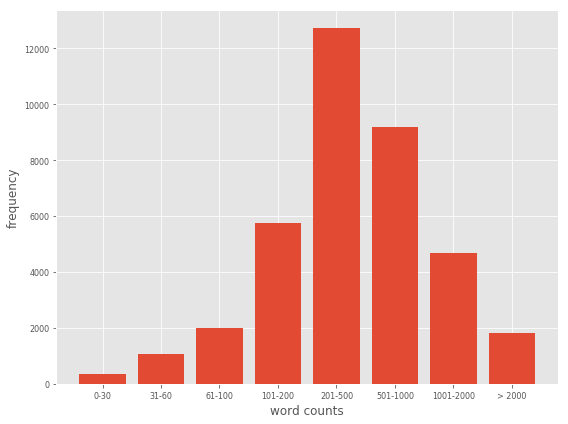

In [393]:
import matplotlib
heights = [len(d[k]) for k in d]
x = list(range(0,len(heights)))
labels = ['0-30', '31-60', '61-100', '101-200', '201-500', '501-1000', '1001-2000', '> 2000']

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(x, heights)
ax.set_xlabel("word counts")
ax.set_ylabel("frequency")
ax.tick_params(labelsize = 8)
plt.xticks(x, labels)
plt.tight_layout()

In [394]:
len(d['d1'])

345

**d1 - tend to be short very short responses**

In [402]:
print_docs(d['d2'], 50)

i know its been awhile since you posted how are you doing
--------------------
only if they are your next of kin i think
--------------------
contemplating contemplating shit i do i need to do something
--------------------
thank you i will defiantly try that
--------------------
thankyou and i will be take care
--------------------
oh yeah i forgot im the god particle
--------------------
i really hope you are safe berrybum    xxx
--------------------
i know the feeling stay strong dont ever give up
--------------------
just wanted to say im sorry to hear this sewso  unique1 xx
--------------------
do you have all those ailments  if so i am so very sorry
--------------------
no help to you but i relate to this
--------------------
ok thanks jennifer i definitely will do that
--------------------
think i need to od dont know how else to get through the day
--------------------
im scared of big spiders and cockroaches and big moths
--------------------
i give you a hug to feel better
--

In [274]:
vect = TfidfVectorizer(stop_words = 'english', ngram_range=(1,2))
vectorized = vect.fit_transform(docs)

In [316]:
voc = vect.vocabulary_
personal = [key for key in voc if (key.split()[0] == "i" or key.split()[0] == "im") and len(key.split()) > 1 ]

In [306]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
Bigram_tagger = nltk.BigramTagger(brown_tagged_sents)
tags = Bigram_tagger.tag(personal)

In [358]:
brown_tagged_sents

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

In [307]:
tags[0:20]

[('im sleeping', None),
 ('im busy', None),
 ('im used', None),
 ('im convinced', None),
 ('im people', None),
 ('im thinking', None),
 ('im just', None),
 ('im sorry', None),
 ('im crowd', None),
 ('im gonna', None),
 ('im starting', None),
 ('im fighting', None),
 ('im good', None),
 ('im woman', None),
 ('im log', None),
 ('im supermarkets', None),
 ('im work', None),
 ('im sure', None),
 ('im medical', None),
 ('im dr', None)]

In [286]:
from nltk import word_tokenize, pos_tag
text = word_tokenize("hello here is the man i try to be when im doing what im doing you know")
%time pos_tag(text)

CPU times: user 188 ms, sys: 24.4 ms, total: 213 ms
Wall time: 234 ms


[('hello', 'NN'),
 ('here', 'RB'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('man', 'NN'),
 ('i', 'VBZ'),
 ('try', 'VBP'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('when', 'WRB'),
 ('im', 'JJ'),
 ('doing', 'VBG'),
 ('what', 'WP'),
 ('im', 'VB'),
 ('doing', 'VBG'),
 ('you', 'PRP'),
 ('know', 'VBP')]

['hello',
 'here',
 'is',
 'the',
 'man',
 'i',
 'try',
 'to',
 'be',
 'when',
 'im',
 'doing',
 'what',
 'im',
 'doing',
 'you',
 'know']

## Reading through some posts

In [388]:
short = [post for key in md for post in md[key] if len(post) < 50]


In [389]:
len(short)

4488

['realizer',
 'shattered sanity',
 'hello',
 'congratulations thats a huge step forward litw',
 'thats great keep up the good work',
 'congrats',
 'rubycube',
 'jennifer 1967',
 '88butterfly88',
 'jennifer 1967',
 'anonymous50013',
 'fuzzybear',
 '88butterfly88',
 '',
 'thanks for sharing i needed to hear that',
 'great job',
 '88butterfly88',
 'congratulation  thanks for sharing your success',
 'congrats overcoming fears feels so good',
 'congratulations beaflower',
 'thank you friends for celebrating with me',
 'turtlerider',
 'alicetailor',
 'pineapple010',
 'drove back and forth to yoga alone',
 'bes22',
 'dowdythefifth',
 'sometimes psychotic',
 'sometimes psychotic',
 'all is revealed',
 'dermald',
 'laurie',
 'bozdickens',
 'pixie1',
 'shattered sanity',
 'shattered sanity',
 'mulan',
 'deejay14',
 'key tones',
 'nike007',
 'nike007',
 'nike007',
 'unhinged88',
 'dowdythefifth',
 'trace14',
 '',
 'i have social anxiety so no unfortunately',
 '',
 'moteofsoul',
 'outkast3000',
 '

# Sampling

In [250]:
keys = list(md.keys())
samples = np.random.randint(0,len(keys), size = 10)
keys_sub = [keys[sample] for sample in samples]
docs = [" ".join(md[ks]) for ks in keys_sub]

In [251]:
for doc in docs:
    print(doc)
    print("-"*30)

i miss having somewhere were i can express myself the last time i truly felt like this was when i was in therapy and it was nice being around those people and we got on and we were all going through social anxiety so i felt belonged and the when it finished it really bothered me because that was the only place ever that i felt okay being myself i was slowly going back to my old closed self again and i miss feeling belonged and important and valued  today i was worried that i was putting pressure on  someone else  to do something for me and then i was walking down the street and i was worried that people were thinking badly of me hi poopy doll and shortgame  ive been better this month like with my social anxiety like today i went shopping and wasnt as worried than before now it like i have new worries about work  looking for work money at and that my cv looks bad coz ive been off work for a long time because of my depression and anxiety and i have a family wedding coming up and it shud 

# Taggers

In [360]:
#training a tagger
pos = defaultdict(list)
sent = "Im ready to go the store. Are you ready? We should go to the movies after. What do you think. Im thinking we shouldnt. Im not feeling well."
sent_list = sent.split()
for sent in sent_list:
    text = nltk.word_tokenize(sent)
    
pos



AttributeError: 'collections.defaultdict' object has no attribute 'append'

In [318]:
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN') ]                    # nouns (default)

regexp_tagger = nltk.RegexpTagger(patterns)
ptag = regexp_tagger.tag(personal)

In [319]:
ptag[0:20]

[('im sleeping', 'VBG'),
 ('im busy', 'NN'),
 ('im used', 'VBD'),
 ('im convinced', 'VBD'),
 ('im people', 'NN'),
 ('im thinking', 'VBG'),
 ('im just', 'NN'),
 ('im sorry', 'NN'),
 ('im crowd', 'NN'),
 ('im gonna', 'NN'),
 ('im starting', 'VBG'),
 ('im fighting', 'VBG'),
 ('im good', 'NN'),
 ('im woman', 'NN'),
 ('im log', 'NN'),
 ('im supermarkets', 'NNS'),
 ('im work', 'NN'),
 ('im sure', 'NN'),
 ('im medical', 'NN'),
 ('im dr', 'NN')]

In [368]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)


{"''": "''",
 '(': '(',
 ')': ')',
 ',': ',',
 '--': '--',
 '.': '.',
 ':': ':',
 ';': '.',
 '?': '.',
 'A': 'AT',
 'But': 'CC',
 'He': 'PPS',
 'I': 'PPSS',
 'In': 'IN',
 'It': 'PPS',
 'Mr.': 'NP',
 'Mrs.': 'NP',
 'New': 'JJ-TL',
 'President': 'NN-TL',
 'The': 'AT',
 '``': '``',
 'a': 'AT',
 'about': 'IN',
 'after': 'IN',
 'against': 'IN',
 'all': 'ABN',
 'also': 'RB',
 'an': 'AT',
 'and': 'CC',
 'any': 'DTI',
 'are': 'BER',
 'as': 'CS',
 'at': 'IN',
 'be': 'BE',
 'been': 'BEN',
 'before': 'IN',
 'but': 'CC',
 'by': 'IN',
 'can': 'MD',
 'could': 'MD',
 'first': 'OD',
 'for': 'IN',
 'from': 'IN',
 'had': 'HVD',
 'has': 'HVZ',
 'have': 'HV',
 'he': 'PPS',
 'her': 'PP$',
 'him': 'PPO',
 'his': 'PP$',
 'home': 'NN',
 'in': 'IN',
 'into': 'IN',
 'is': 'BEZ',
 'it': 'PPS',
 'its': 'PP$',
 'last': 'AP',
 'made': 'VBN',
 'more': 'AP',
 'new': 'JJ',
 'no': 'AT',
 'not': '*',
 'of': 'IN',
 'on': 'IN',
 'one': 'CD',
 'only': 'AP',
 'or': 'CC',
 'other': 'AP',
 'out': 'RP',
 'over': 'IN',
 'said':

In [324]:
fd['the']

5580

In [327]:
cfd['grand']

FreqDist({'JJ': 13})

In [329]:
bts = brown.tagged_sents(categories = 'news')

In [333]:
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
Bigram_tagger = nltk.BigramTagger(train_sents)
Bigram_tagger.evaluate(test_sents)

0.10206319146815508

# Building a classifier

In [572]:
anx_post.head()

,pid,user,post_title,post,post_type,mood,thread_title,forum_name
0,1592723,Andy1963,Sudden Onset Anxiety - Please help!,hi ive never suffered any sort of anxiety befo...,author,nan,Sudden Onset Anxiety - Please help!,Generalized Anxiety Disorder
1,1592736,Zardos,nan,i can sympathize i get crippling anxiety when ...,responder,nan,Sudden Onset Anxiety - Please help!,Generalized Anxiety Disorder
2,1594183,rachelangelo,nan,im sorry youre dealing with this i dont know i...,responder,nan,Sudden Onset Anxiety - Please help!,Generalized Anxiety Disorder
3,1598245,akash,nan,apart from medical help there are many tricks ...,responder,nan,Sudden Onset Anxiety - Please help!,Generalized Anxiety Disorder
4,585119,Mayfair,nan,great tune i had my beatles number one hits i...,responder,nan,didnt know where to post this,Social Anxiety


### Creating my features and labels

In [24]:
df = anx_post[['user', 'post', 'mood', 'post_type']]

In [25]:
df['label'] = df['post_type'].apply(lambda x: 0 if x == 'author' else 2)

/Users/mill/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [169]:
df.head()

,user,post,mood,post_type,label
0,Andy1963,hi ive never suffered any sort of anxiety before but over the last five days i have started experiencing some weird sort of dread fear i cant pin it down to anything but it is scary its like an ov...,nan,author,0
1,Zardos,i can sympathize i get crippling anxiety when i go to bed and first thing on a morning it gets better during the day when im busy and then at night i dont want to get into bed has anything chang...,nan,responder,2
2,rachelangelo,im sorry youre dealing with this i dont know if youre going through something stressful in life right now but often our body responds in odd ways to stress when you start feeling the dread try bre...,nan,responder,2
3,akash,apart from medical help there are many tricks and tips to ease anxiety attacks in minutes if you too are suffering from anxiety attacks you can try these effective tricks to kill anxiety accept i...,nan,responder,2
4,Mayfair,great tune i had my beatles number one hits in my car last week they are genius with chords thats their secret but only weirdos like me recognise it my car got broke into last week and they empti...,nan,responder,2


#### splitting df into "author" / "responder"

In [34]:
df_res = df[df["post_type"] == 'responder']
df_auth = df[df["post_type"] == 'author']

### Creating my label data

In [295]:
df_res.to_pickle("df_res.pkl")

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
# creating the way to manually label
def manlab_p(df_res):
    proceed = input("Proceed: ")
    i = 0
    n = 1
    while proceed  == 'y':
        if i%10 == 0:
            proceed = input("Proceed: ")
        label = int(input("{} / {}: ".format(n, df_res['post'].iloc[i])))
        if label == 0:
            df_res['post'][i] = label
        i += 1
        n += 1
    #safety saving
    df_res.to_pickle("df_res.pkl")
    return df_res
        
            
            
        
        
    

In [42]:
df_res = manlab_p(df_res)

Proceed: y
Proceed: y
1 / i can sympathize i get crippling anxiety when i go to bed and first thing on a morning it gets better during the day when im busy and then at night i dont want to get into bed   has anything changed in your life recently  with me its living on myown im still not used to it and its been four years: q


ValueError: invalid literal for int() with base 10: 'q'

**remove responders that have i or im in the post**
- i just want responders where i can be more sure that they aren't talking about themselves

In [192]:
df_res.head(40)

,user,post,mood,post_type,label
1,Zardos,i can sympathize i get crippling anxiety when i go to bed and first thing on a morning it gets better during the day when im busy and then at night i dont want to get into bed has anything chang...,nan,responder,2
2,rachelangelo,im sorry youre dealing with this i dont know if youre going through something stressful in life right now but often our body responds in odd ways to stress when you start feeling the dread try bre...,nan,responder,2
3,akash,apart from medical help there are many tricks and tips to ease anxiety attacks in minutes if you too are suffering from anxiety attacks you can try these effective tricks to kill anxiety accept i...,nan,responder,2
4,Mayfair,great tune i had my beatles number one hits in my car last week they are genius with chords thats their secret but only weirdos like me recognise it my car got broke into last week and they empti...,nan,responder,2
5,Ainsworth11,i quite like being a wierdo bastards for the car i loved oasis i used to play wonderwall to my oldest son as a baby to get him off to sleep and i do have the beatles on my ipad and iphone let it...,nan,responder,2
6,Ainsworth11,why did i post this in social anxiety ah well never mind i got some sleepers from boots yesterday slept for 4 hours but felt i had been hit round the head with a baseball bat when i woke up as y...,nan,responder,2
7,Macka,anxietys a response from the body saying somethings not right with emotions or feelings long term stressful situations can be a common cause this erodes the ability of the nervous system to do its...,Inspired,responder,2
9,Macka,hi ark i also love writing something in me since i can remember when i was in the beginnings of my breakdown i wrote 30000 words in ten days my pc permanently crashed and so did my brain when...,Inspired,responder,2
10,oneday,hi ainsworth i came across these stacks of ideas for sleeping better so thought id post how to sleep better tips for getting a good nightrsquos sleep i find practicing progressive muscle relaxa...,nan,responder,2
11,wendolene26,the beatles help album was the first cd album i got given when my parents bought my a cd player hifi i was learning guitar and playing a lot of the beatles tunes as they have easy chords so i sup...,Paranoid,responder,2


#### Grab feelings words

In [31]:
from pc_scrape import *

In [32]:
response = get_request("https://myvocabulary.com/word-list/adjectives-of-negative-feelings-vocabulary/")

In [33]:
soup = soupify(response)

In [34]:
tr = soup.find("tr",{"class": 'mv-literature-first-row'})

In [35]:
tds = tr.findAll("td", {"style": False})


#### creating the feeling vocab

In [40]:
feelings = []
for td in tds:
    feelings.append(td.text)

In [41]:
feelings = feelings[1:]
feelings = [word.lower() for string in feelings for word in string.split()]
feelings = set(feelings)

In [42]:
feelings.update(["feel", "feeling", "felt"])

In [116]:
feelings = list(["feel", "feeling", "felt", "worried", "sad", "anxious", "scarred", "afraid", "i have", "makes me"])

In [149]:
anx_post['label'] = anx_post['post_type'].apply(lambda x: 0 if x == 'author' else 1)

**Upload  pkl file

In [176]:
df['label'].value_counts()

1    39546
0     8360
Name: label, dtype: int64

In [158]:
df = pd.read_pickle("df_man.pkl")

In [159]:
auth = anx_post[df['post_type'] == 'author']
res = anx_post[df['post_type'] == 'responder']

In [160]:
res_per = res[res['post'].str.contains("(i feel|im feeling|im worried|my anxiety|i have felt)", regex = True)]
res_no = res.drop(res_per.index)

res_per['label'] = 0 

In [161]:
df_know = pd.concat([auth, res_per])
df_know.reset_index(drop = True, inplace = True)
df_res = res_no
df_res.reset_index(drop = True, inplace = True)


In [162]:
#trying different methods
indices_to_remove = []
for i,p in enumerate(df_res['post']):
    len_doc = len(p.split())
    if len(p.split()) == 0:
        indices_to_remove.append(i)
        continue
        
    numi = p.split().count("i") + p.split().count("im")
    numyou = p.split().count("you")+ p.split().count("your") + p.split().count("youre") + p.split().count("u")
    i_rate = numi/len_doc
    you_rate = numyou/len_doc
    
    if df_res['label'][i] == 0:
        continue
    elif (i_rate > you_rate):
        indices_to_remove.append(i)
    elif (i_rate > you_rate):
        indices_to_remove.append(i)
    else:
        continue
        

#### adding feelings
# indices_to_remove = []
# label_change = []
# for i,p in enumerate(df['post']):
#     len_doc = len(p.split())
#     if len_doc == 0:
#         indices_to_remove.append(i)
#         continue
        
#     numi = p.split().count("i") + p.split().count("im")
#     numyou = p.split().count("you")+ p.split().count("your") + p.split().count("youre") + p.split().count("u")
#     i_rate = numi/len_doc
#     you_rate = numyou/len_doc
    
#     feelnum = sum([word in p.split() for word in feelings])
#     if df['post_type'][i] == 'author':
#         continue
#     elif (i_rate > you_rate) and feelnum > 1:
#         label_change.append(i)
#     elif (i_rate > you_rate):
#         indices_to_remove.append(i)
#     else:
#         continue
        
   

**Creating the responder df that I want to predict later**

**This will be responders I'm not sure about**

In [163]:
df_predict = pd.concat([df_res.iloc[indices_to_remove]])
df_res.drop(df.index[[indices_to_remove]], inplace = True)
df_res.reset_index(drop= True, inplace = True)

#### change label for some responders

**Removing authors that don't mention "i" or "im"**
- sometimes authors ask questions or post general information so i want to remove them

In [164]:
author_to_remove = []
for i,p in enumerate(df_know['post']):
    if p.split().count("i") + p.split().count("im") == 0:
        author_to_remove.append(i)
    else:
        continue


**updating the responder df**

In [165]:
df_predict = pd.concat([df_predict, df_know.iloc[author_to_remove]])
df_know.drop(df_know.index[[author_to_remove]], inplace = True)

In [166]:
df_know = pd.concat([df_know, df_res])
df_know.reset_index(drop = True, inplace = True)

In [167]:
df_predict.reset_index(drop = True, inplace = True)

**Looking at the dataframe that only contains authors w/ (personal posts) and responders w/ (non-personal posts)**

In [168]:
df_know['label'].value_counts()


1    19860
0    11369
Name: label, dtype: int64

#### Trying word counts

In [179]:
docs = [df_know['post'][i] for i in range(0,len(df_know))]

In [180]:
tokens = set()
for doc in docs:
    tokens.update(doc.split())

In [181]:
tokens_list = list(tokens)

In [182]:
vocab_dict = {word: i for i, word in enumerate(tokens_list)}

In [183]:
import numpy as np

word_counts = np.zeros((len(docs), len(tokens)))
for doc_id, words in enumerate(docs):
    for word in words.split():
        word_id = vocab_dict[word]
        word_counts[doc_id][word_id] += 1

In [184]:
from sklearn.naive_bayes import MultinomialNB

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
clf = MultinomialNB()

In [187]:
X = word_counts
y = np.array(df_know['label'])

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 38)

In [189]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [190]:
clf.score(X_test,y_test)

0.89000960614793467

**Naive Bayes isn't working all that well bc of my initial assumption about what is personal and not**

**The model is predicting well, but the criteria initially gave it needs to be tuned**

**Term frequencies perform worse than word counts**

#### predicting responders I'm unsure about 

In [135]:
docs = df_predict['post']

In [136]:
import numpy as np

word_counts = np.zeros((len(docs), len(tokens)))
for doc_id, words in enumerate(docs):
    for word in words.split():
        if word not in vocab_dict:
            continue
        else:
            word_id = vocab_dict[word]
            word_counts[doc_id][word_id] += 1

In [137]:
word_counts.shape

(16677, 55216)

In [138]:
X = word_counts

**Probability predictions**

In [139]:
labels_proba = clf.predict_proba(X)

**Hard classification labels**

In [140]:
labels = clf.predict(X)

In [141]:
df_predict.drop("label", axis = 1, inplace = True)

**Adding hard classification labels**

In [142]:
df_predict['pred'] = labels

In [143]:
df_predict['prob_personal'] = labels_proba[:,0]

In [144]:
df_predict.reset_index(drop = True, inplace = True)

**Seeing how the prediction did**

In [145]:
pd.set_option('max_colwidth' , 200)

In [147]:
df_predict.head(50)

,pid,user,post_title,post,post_type,mood,thread_title,forum_name,pred,prob_personal
0,1592736,Zardos,nan,i can sympathize i get crippling anxiety when i go to bed and first thing on a morning it gets better during the day when im busy and then at night i dont want to get into bed has anything chang...,responder,nan,Sudden Onset Anxiety - Please help!,Generalized Anxiety Disorder,0,1.000000
1,585119,Mayfair,nan,great tune i had my beatles number one hits in my car last week they are genius with chords thats their secret but only weirdos like me recognise it my car got broke into last week and they empti...,responder,nan,didnt know where to post this,Social Anxiety,0,0.960208
2,586791,Ainsworth11,nan,why did i post this in social anxiety ah well never mind i got some sleepers from boots yesterday slept for 4 hours but felt i had been hit round the head with a baseball bat when i woke up as y...,responder,nan,didnt know where to post this,Social Anxiety,0,0.999998
3,1599105,Macka,nan,hi ark i also love writing something in me since i can remember when i was in the beginnings of my breakdown i wrote 30000 words in ten days my pc permanently crashed and so did my brain when...,responder,Inspired,"Is this GAD? My mind keeps creating associations between things and anxiety, and they're ruining my life!",Generalized Anxiety Disorder,0,1.000000
4,586857,wendolene26,nan,the beatles help album was the first cd album i got given when my parents bought my a cd player hifi i was learning guitar and playing a lot of the beatles tunes as they have easy chords so i sup...,responder,Paranoid,didnt know where to post this,Social Anxiety,0,0.920500
5,589807,Ainsworth11,nan,seroqueltis all looking for understanding and i get a drug,responder,nan,didnt know where to post this,Social Anxiety,0,0.506595
6,1598695,blacksmoke,nan,hello janey1966 hey janey yeah the second half of life stinks i am really seeing my mother for who she really is fooled myself for the first half really sorry for what you are going through yeah ...,responder,Sad,Feeling More Anxious The Older I Get. I Am 51.,Generalized Anxiety Disorder,0,0.909906
7,1598189,frogsplash,nan,hi i would recommend watching some youtube videos regarding dealing with anxiety and worrying less,responder,nan,feeling anxious,Generalized Anxiety Disorder,1,0.260317
8,536359,yesican,nan,i wish it was just one beer one beer doesnt do anything for me it starts with a beer then two then three and so on i dont get drunk but i definitely do drink too much its not good for my health me...,responder,Blah,social anxiety... causing me to drink too much,Social Anxiety,0,1.000000
9,536365,yesican,nan,no i am sure that we havent spoken before this is my first time talking about this on a forum,responder,Blah,social anxiety... causing me to drink too much,Social Anxiety,0,0.892873


In [160]:
df_pred['post'][20]

'they used to have 2 other properties  im not sure if they still rent them or sold them or what for some reason i think after he got divorced he decided to live in one  one of those strange divorce arrangements where they rotate out of the main house for the sake of the kids    i left the water dripping in the kitchen sink   i just gotta get out of there  and nope hes not getting any notice  hes not giving me any information about a new heating unit  just sitting there so no notice for him  and i dont have a leasing contract with him so i dont have to give any  notice courtesy sure but exactly what kind am i getting  none'

# Manually labeling personal and advice

In [155]:
# creating the way to manually label
def manlab_p(df_pkl, rx,  col):
    pd.set_option('max_colwidth' , 200)
    df = pd.read_pickle(df_pkl)
    df_res = df[df['post_type']== "responder"]
    df_lab = df_res[df_res['post'].str.contains(rx , regex = True)]
    proceed = input("Proceed: ")
    n = 1
    while proceed  == 'y':
        if n%10 == 0:
            proceed = input("Proceed: ")
        ind = int(np.random.choice(df_lab.index, size = 1))
        label = (input("Personal(0) {} / {}: ".format(n, df['post'].iloc[ind])))
        if label == 'x':
            break
        label = int(label)
        df[col][ind] = label
        n += 1
    #safety saving
    df.to_pickle('df_man.pkl')
    return df

In [157]:
rx = ""
df = manlab_p("df_man.pkl", rx, 'label')

Proceed: y
Personal(0) 1 / hi misskitty your gp should not dissmiss anything that is real to you its not for him to decide what is real to you and what is not my advice to you would be to go back to the gp and if you get the same response change and see another one i have not experienced the side effects that you have but then people feel different things go back and get it sorted because it is obviously destressing you: 1
Personal(0) 2 / hi i empathise with the bad plumbing situation ive had similar problems since ive been here you dont have a saniflo or similar macerator connected to your loo by any chance they seem to be a cheap easier and smaller alternative to the usual plumbing system  also seems to be very volatile ive got a washing machine shower loo  sink attached to this one macerator as far as i know  have had no end of trouble  i honestly know how much stress it can cause especially with existing anxiety issues i so hope you enjoy the time at your friends house manage to re

Personal(0) 14 / ouch  if i were you id switch off the phone ringerget a phone with caller display if you can afford it these sorts are persistent im still troubled by a female friend who would love to hook me back into that sort of jolly goings on she aint but its a horrible feeling terrifying in fact do hope you manage to keep on holding out  good luck: 1
Personal(0) 15 / thank you unique1 xxx: 1
Personal(0) 16 / thanl you for your reply i dont think i have depression as i dont really fit in with most of the symptoms but have considered it previously my issue with therapy or similar things is that if i were to attend sessions that would mean that everyone is taking a much more active role in what i consider to be my own personal issues my mental health and issues are to me something very private  and for them to be on the table  everyone around me sounds terrible i understand the potential benefits of therapy but from my perspective i cant judge whether i want it or not     updated  

Personal(0) 31 / there aint no two ways about it thats for sure but satan aint gonna get the better of me ill get jesus on the case and im not being funny or nothing but as i said there aint no two ways about it the holy spirit shts up the evil and even though im pagan i still turn to the holy spirit: 1
Personal(0) 32 / i moved house a month ago and since being here ive seen some really big ones im always conscious of spider seasons and when autumn is coming i try to keep the house cleaner than i normally would i vacuum in all the corners and make sure that there arent many places they could hide by keeping all my floors free from any clutter all when i can be bothered though they seem to like dusty places they always emerge from my bathroom so i keep a horse chestnut in there because they apparently dont like it there was a time when i would just shake and cry on seeing a spider and although that does sometimes still happen its less frequent there was a big one in the bath the other d

Personal(0) 42 / gonna jump in again if i may this sleep patern problems im seeing i had similar and was told that having something on at bedtime ie radio or tv distracted the brain and it was easier to sleep has anyone tried this i found it works great have the tv on every night and soon drop off only trouble now is daytime tv every time i see jeremy kyle i nod off lol: 1
Personal(0) 43 / hello nschofield  i hope the forum is a good place for you where you find you are not alone i just wanted to say welcome and i go through similar to you in that i think i am going to die all the time i can get really low without people around me but some people make me paranoid too i think the trick is to focus on what you can do to counteract the anxiety and feel more relaxed try massages or warm baths and body lotions relaxation exercisesrelaxing music slow down and enjoy things at a slower pacealso if being alone is a problem learn how to enjoy the solitude and find ways that are enjoyable to fill